# __Data Preprocessing__

In [379]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# global settings
# show all col/rows without hiding 
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) 

## __1) Load Dataset__
View boxplot for indivdual attributes
- Profile factor selected as it has highest number of outliers

In [380]:
# headers
col_name_meterB = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle',
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4', 'Average Flow Velocity', 'Speed of Sound P1',
    'Speed of Sound P2', 'Speed of Sound P3', 'Speed of Sound P4',
    'Average Speed of Sound', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4',
    'Meter Performance', 'Signal Quality P1T', 'Signal Quality P1R',
    'Signal Quality P2T', 'Signal Quality P2R', 'Signal Quality P3T',
    'Signal Quality P3R', 'Signal Quality P4T', 'Signal Quality P4R',
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R', 'Transit Time P1T', 'Transit Time P1R',
    'Transit Time P2T', 'Transit Time P2R', 'Transit Time P3T',
    'Transit Time P3R', 'Transit Time P4T', 'Transit Time P4R', 'Class'
]

col_name_meterB_no_class = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle',
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4', 'Average Flow Velocity', 'Speed of Sound P1',
    'Speed of Sound P2', 'Speed of Sound P3', 'Speed of Sound P4',
    'Average Speed of Sound', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4',
    'Meter Performance', 'Signal Quality P1T', 'Signal Quality P1R',
    'Signal Quality P2T', 'Signal Quality P2R', 'Signal Quality P3T',
    'Signal Quality P3R', 'Signal Quality P4T', 'Signal Quality P4R',
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R', 'Transit Time P1T', 'Transit Time P1R',
    'Transit Time P2T', 'Transit Time P2R', 'Transit Time P3T',
    'Transit Time P3R', 'Transit Time P4T', 'Transit Time P4R'
]

df_meterB = pd.read_csv('dataset/Meter B', header=None, sep='\t')
df_meterB.columns = col_name_meterB

df_meterB.head()


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,1486.38217,1485.37206,1484.98900,1485.15322,5260.65556,5067.58889,4977.82222,4984.07778,5170.31111,5200.20556,4111.52778,4291.85000,9.03894,4.42683,4.50456,9.24122,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,1486.25922,1485.25033,1484.86706,1485.03072,5256.22778,5065.40000,4978.02222,4981.43333,5172.34444,5200.81667,4107.14444,4286.32778,9.03017,4.28400,4.59750,9.16644,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,1486.28822,1485.28100,1484.89889,1485.06111,5278.55000,5002.90000,4971.04444,4958.05556,5146.37778,5179.37222,4039.27222,4302.88333,9.78072,4.61200,4.54478,10.23117,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,1486.35717,1485.35044,1484.97017,1485.13128,5276.14444,4994.79444,4973.30556,4956.30556,5149.92222,5175.68889,4036.35556,4297.37778,9.74939,4.83533,4.74928,10.94506,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,1486.32844,1485.32050,1484.94433,1485.10328,5272.71667,4993.56111,4969.87778,4952.24444,5147.42222,5174.01111,4035.33889,4297.57222,9.60233,4.47989,4.71683,9.98406,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


## __2) Identity Outlier Data in the attributes__
View boxplot for individual attributes
- Profile factor selected as it has highest number of outliers


Text(0.5, 1.0, 'Comparing Attributes - Boxplot')

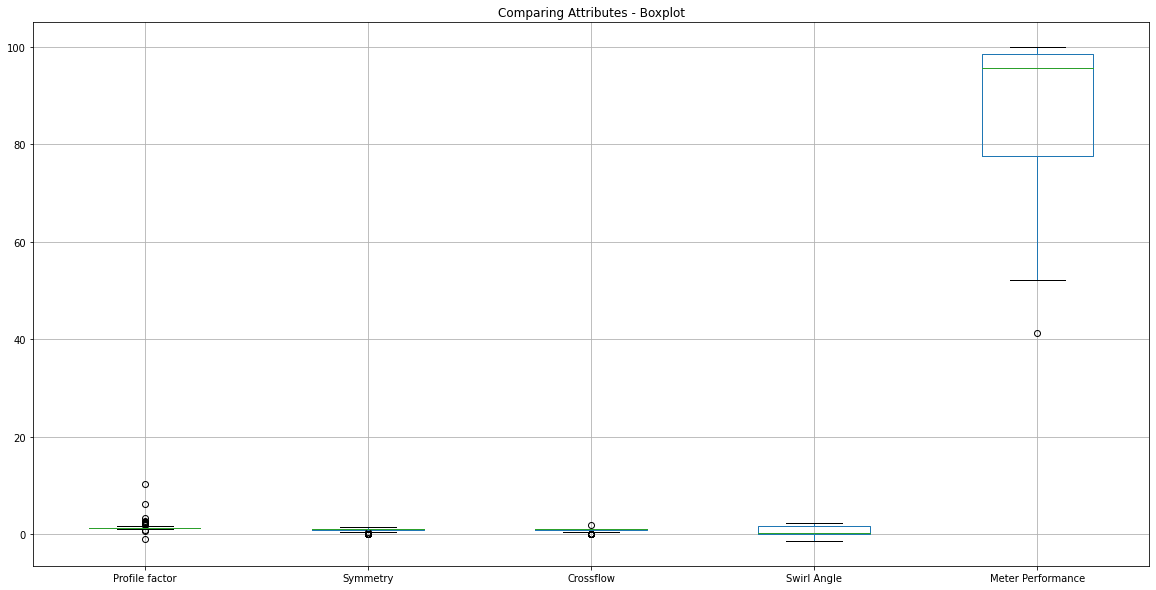

In [381]:
col_name_list= [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle', 'Meter Performance' ,
]

df_meterB[col_name_list].boxplot(figsize=(20,10))
plt.title('Comparing Attributes - Boxplot')

Inital Line Graph

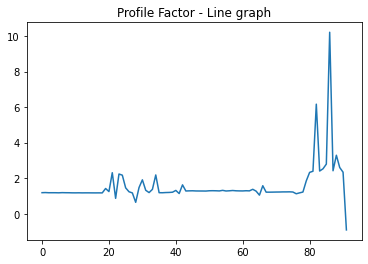

In [382]:
val_1 = df_meterB['Profile factor']
plt.title('Profile Factor - Line graph')
plt.plot(val_1)
plt.show()

## __3) Check Missing Value__
Check missing value and drop row with missing value. However, Meter B has no missing value so no rows dropped




In [383]:
# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",df_meterB.shape)
res = df_meterB.notnull()
print("\nDataFrame displaying False for Null (NaN) value = \n",res)

df_meterB = df_meterB.dropna()
print("\nDataFrame after removing null values...\n",df_meterB)
print("\n(Updated) Number of rows and column in our DataFrame = ",df_meterB.shape)


Number of rows and column in our DataFrame =  (92, 52)

DataFrame displaying False for Null (NaN) value = 
     Profile factor  Symmetry  Crossflow  Swirl Angle  Flow Velocity P1  \
0             True      True       True         True              True   
1             True      True       True         True              True   
2             True      True       True         True              True   
3             True      True       True         True              True   
4             True      True       True         True              True   
..             ...       ...        ...          ...               ...   
87            True      True       True         True              True   
88            True      True       True         True              True   
89            True      True       True         True              True   
90            True      True       True         True              True   
91            True      True       True         True              True   

  

## __4) Check for Duplicate Values__
Check for duplicate rows for all columns. However, Meter B has no duplicate rows for all columns.


In [384]:
dups = df_meterB.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## __5) Check for 0 value in dataset__
Check number of 0 values for each column. 

Columns that have 15 rows with 0 values:
- Symmetry, Crossflow, Swirl Angle, Flow velocity P4, Speed of Sound P4, Signal Strength 4T/4R, Transit Time 4T/4R


In [385]:
# Count number of zeros in all columns of Dataframe
for column_name in df_meterB.columns:
    column = df_meterB[column_name]
    # Get the count of Zeros in each column 
    count = (column == 0).sum()
    print(f'Count of zeros in column: {column_name} is : {count}')

Count of zeros in column: Profile factor is : 0
Count of zeros in column: Symmetry is : 15
Count of zeros in column: Crossflow is : 15
Count of zeros in column: Swirl Angle is : 15
Count of zeros in column: Flow Velocity P1 is : 0
Count of zeros in column: Flow Velocity P2 is : 0
Count of zeros in column: Flow Velocity P3 is : 0
Count of zeros in column: Flow Velocity P4 is : 15
Count of zeros in column: Average Flow Velocity is : 0
Count of zeros in column: Speed of Sound P1 is : 0
Count of zeros in column: Speed of Sound P2 is : 0
Count of zeros in column: Speed of Sound P3 is : 0
Count of zeros in column: Speed of Sound P4 is : 15
Count of zeros in column: Average Speed of Sound is : 0
Count of zeros in column: Signal Strength P1T is : 0
Count of zeros in column: Signal Strength P1R is : 0
Count of zeros in column: Signal Strength P2T is : 0
Count of zeros in column: Signal Strength P2R is : 0
Count of zeros in column: Signal Strength P3T is : 0
Count of zeros in column: Signal Stre

## __6) Count Labels of original dataset:__
- Healthy: 19
- Gas Injection: 14
- Waxing: 35
 

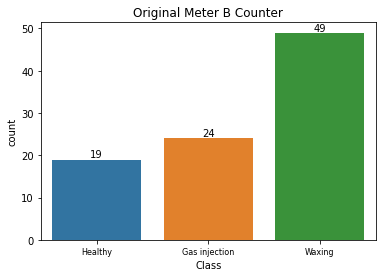

In [386]:
ax = sns.countplot(x=df_meterB['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('Original Meter B Counter')
plt.show()

## __7) 2 Paths to handle 0 value:__ 
1. Remove whole row with 0 (df_remove_meterB)
- 57 rows remained (35 rows removed)

2. Replace 0 with median (df_median_meterB) (<-- Select IQT -> Zcore better cluster shown in scatterplot)
- 62 rows remained (30 rows removed)

Steps: 
1)  Select Profile Factor 
2)  View Box plot (IQT), Line graph
    - The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.
3) Remove outlier with Zscore
    - The further away an observation’s Z-score is from zero, the more unusual it is. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero.

### __7.1) 1st Method: Remove whole row with 0__
- df_remove_meterB(IQT->Zscore) 

In [387]:
print('Inital Shape: '+str(df_meterB.shape))
df_remove_meterB = df_meterB.replace(0, np.nan)
df_remove_meterB = df_remove_meterB.dropna(how='any', axis=0) # axis = 0(row), = 1(columns)
df_remove_meterB = df_remove_meterB.replace(np.nan, 0)
print('After remove 0 Shape: '+str(df_remove_meterB.shape))

Inital Shape: (92, 52)
After remove 0 Shape: (77, 52)


Initial Line Graph 

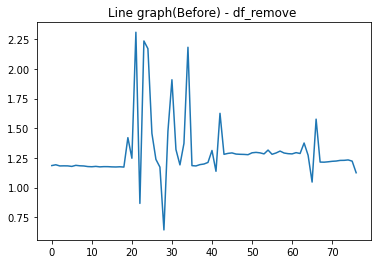

<Figure size 720x504 with 0 Axes>

In [388]:
val_1 = df_remove_meterB['Profile factor']
plt.title('Line graph(Before) - df_remove ')
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

#### IQT Boxplot for Profile Factor (df_remove)

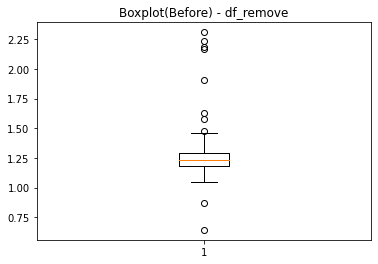

<Figure size 720x504 with 0 Axes>

IQR: 0.11020555599999993 Upper bound: 1.4574972229999998 Lower bound: 1.0166749990000001
Number of outliers: 10
The following are the outliers in the boxplot: 
21   2.30833
22   0.86628
23   2.23479
24   2.16995
28   0.64294
29   1.47445
30   1.90803
34   2.18176
42   1.62528
66   1.57610
Name: Profile factor, dtype: float64
After remove 0 Shape: (77, 52)


In [389]:
val_1 = df_remove_meterB['Profile factor']
plt.boxplot(val_1)
plt.title('Boxplot(Before) - df_remove')
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print("Number of outliers: "+ str(len(outliers)))
print('The following are the outliers in the boxplot: \n{}'.format(outliers))
print('After remove 0 Shape: '+str(df_remove_meterB.shape))

#### Remove outliers

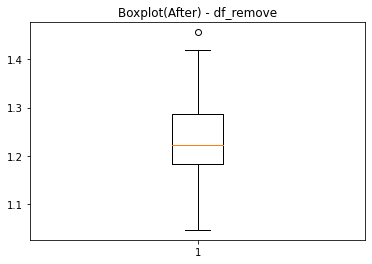

<Figure size 720x504 with 0 Axes>

After remove IQT outliers Shape: (67, 52)


In [390]:
df_remove_meterB.drop(df_remove_meterB.index[[21,22,23,24,28,29,30,34,42,66]],inplace=True)

val_1 = df_remove_meterB['Profile factor']
plt.title('Boxplot(After) - df_remove')
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()


print('After remove IQT outliers Shape: '+str(df_remove_meterB.shape))


#### Line graph for Profile Factor (df_remove)

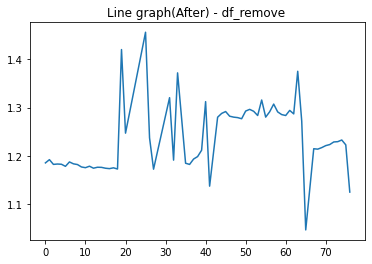

<Figure size 720x504 with 0 Axes>

In [391]:
val_1 = df_remove_meterB['Profile factor']
plt.title('Line graph(After) - df_remove ')
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

#### Apply Zscore to all columns (df_remove)
- 67 to 57 =  10 rows removed 

In [392]:
z_scores = stats.zscore(df_remove_meterB)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_remove_meterB = df_remove_meterB[filtered_entries]

print('After Zscore Shape: '+str(df_remove_meterB.shape))

After Zscore Shape: (57, 52)


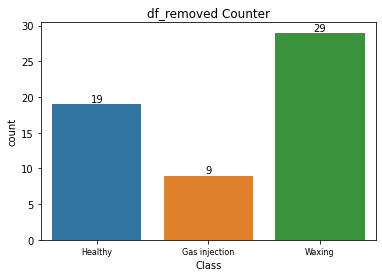

In [393]:
ax = sns.countplot(x=df_remove_meterB['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('df_removed Counter')
plt.show()

### __7.2) 2nd Method: Replace 0 with median__
- df_median_meterB(IQT->Zscore) <--Select> able to view cluster within scatterplot better
- df_median_meterB2(Zcore -> IQT)

#### __df_median_meterB(IQT->Zscore)__ 

Replace 0 with median

In [394]:
df_median_meterB = df_meterB
for col_name in df_meterB.columns:
    df_median_meterB.loc[df_median_meterB[col_name] == 0, str(col_name)] = df_median_meterB[col_name].median()
print('Inital Shape: '+str(df_median_meterB.shape))

Inital Shape: (92, 52)


Inital Line Graph 
- y axis inital range 0 to 10

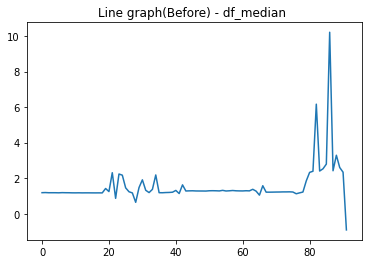

<Figure size 720x504 with 0 Axes>

In [395]:
val_1 = df_median_meterB['Profile factor']
plt.title('Line graph(Before) - df_median ')
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()


IQT Boxplot for Profile Factor (df_median)

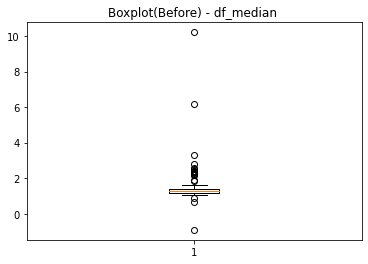

<Figure size 720x504 with 0 Axes>

IQR: 0.19005833324999966 Upper bound: 1.6577847218749993 Lower bound: 0.8975513888750006
The following are the outliers in the boxplot:21    2.30833
22    0.86628
23    2.23479
24    2.16995
28    0.64294
30    1.90803
34    2.18176
79    1.84874
80    2.32609
81    2.39119
82    6.16316
83    2.40243
84    2.52812
85    2.79266
86   10.20850
87    2.41811
88    3.29042
89    2.60104
90    2.33680
91   -0.90917
Name: Profile factor, dtype: float64
Number of outliers: 20


In [396]:
val_1 = df_median_meterB['Profile factor']
plt.title('Boxplot(Before) - df_median ')
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))

Remove outliers

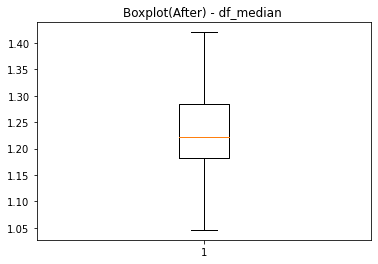

<Figure size 720x504 with 0 Axes>

After remove IQT outliers Shape: (68, 52)


In [397]:
df_median_meterB.drop(df_median_meterB.index[[21,22,23,24,28,28,30,34,79,80,81,82,83,84,85,86,87,88,89,90,91,25,29,42,66]],inplace=True)
val_1 = df_median_meterB['Profile factor']
plt.title('Boxplot(After) - df_median ')
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()
print('After remove IQT outliers Shape: '+str(df_median_meterB.shape))


Line graph for Profile Factor (df_median)
- Initial: 0 to 10
- After removal of outliers: 1.05 to 1.40

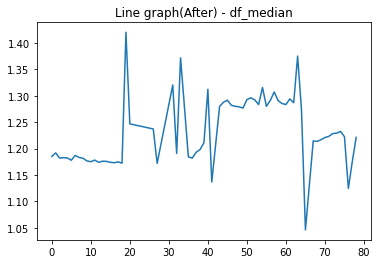

<Figure size 720x504 with 0 Axes>

In [398]:
val_1 = df_median_meterB['Profile factor']
plt.title('Line graph(After) - df_median')
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

Apply Zscore to all columns (df_median)

68 to 58 = 10 rows removed

In [399]:
z_scores = stats.zscore(df_median_meterB)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_median_meterB = df_median_meterB[filtered_entries]
print('After Zscore Shape: '+str(df_median_meterB.shape))

After Zscore Shape: (58, 52)


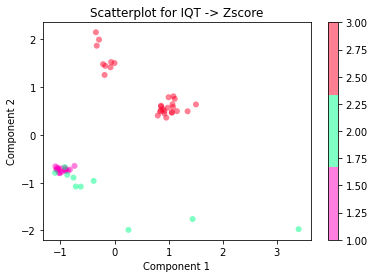

In [400]:
dataset = df_median_meterB

X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

scaler = StandardScaler()
X=scaler.fit_transform(X)


plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatterplot for IQT -> Zscore')
plt.colorbar()

Class labels

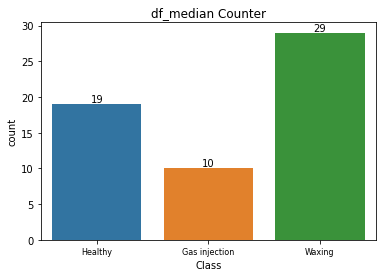

In [401]:
ax = sns.countplot(x=df_median_meterB['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('df_median Counter')
plt.show()

#### __df_median_meterB2(Zscore->IQT)__ 

In [402]:
df_meterB = pd.read_csv('dataset/Meter B', header=None, sep='\t')
df_meterB.columns = col_name_meterB

df_median_meterB2 = df_meterB
for col_name in df_meterB.columns:
    df_median_meterB2.loc[df_median_meterB2[col_name] == 0, str(col_name)] = df_median_meterB2[col_name].median()
print('Inital Shape: '+str(df_median_meterB2.shape))

Inital Shape: (92, 52)


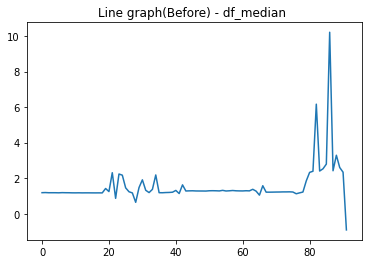

<Figure size 720x504 with 0 Axes>

In [403]:
val_1 = df_median_meterB2['Profile factor']
plt.title('Line graph(Before) - df_median ')
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

Zcore = 92 to 82

In [404]:
z_scores = stats.zscore(df_median_meterB2)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_median_meterB2 = df_median_meterB2[filtered_entries]
df_median_meterB2= df_median_meterB2.reset_index(drop=True)
print('After Zscore Shape: '+str(df_median_meterB2.shape))

After Zscore Shape: (82, 52)


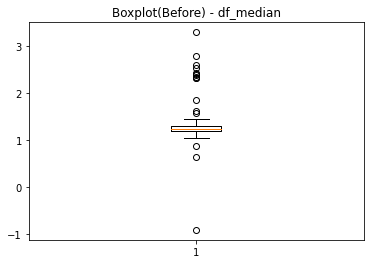

<Figure size 720x504 with 0 Axes>

IQR: 0.11160138874999981 Upper bound: 1.4610590271249997 Lower bound: 1.0146534721250005
The following are the outliers in the boxplot:
21    2.30833
22    0.86628
26    0.64294
35    1.62528
59    1.57610
71    1.84874
72    2.32609
73    2.39119
74    2.40243
75    2.52812
76    2.79266
77    2.41811
78    3.29042
79    2.60104
80    2.33680
81   -0.90917
Name: Profile factor, dtype: float64
Number of outliers: 16


In [405]:
val_1 = df_median_meterB2['Profile factor']
plt.title('Boxplot(Before) - df_median')
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot:\n{}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))

Remove outliers

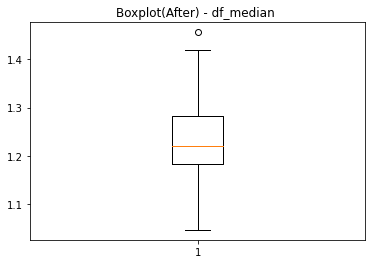

<Figure size 720x504 with 0 Axes>

After remove IQT outliers Shape: (66, 52)


In [406]:
df_median_meterB2.drop(df_median_meterB2.index[[21,22,26,35,59,71,72,73,74,75,76,77,78,79,80,81]],inplace=True)
val_1 = df_median_meterB2['Profile factor']
plt.title('Boxplot(After) - df_median ')
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()
print('After remove IQT outliers Shape: '+str(df_median_meterB2.shape))

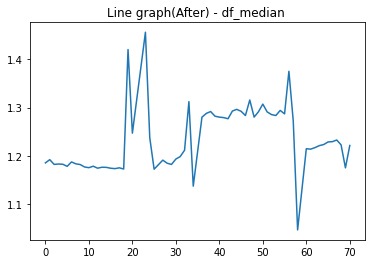

<Figure size 720x504 with 0 Axes>

In [407]:
val_1 = df_median_meterB2['Profile factor']
plt.title('Line graph(After) - df_median ')
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

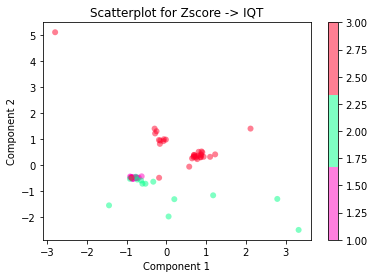

In [408]:
dataset = df_median_meterB2

X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

scaler = StandardScaler()
X=scaler.fit_transform(X)


plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatterplot for Zscore -> IQT')
plt.colorbar()

Class Labels

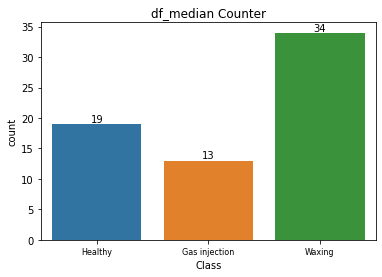

In [409]:
ax = sns.countplot(x=df_median_meterB2['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('df_median Counter')
plt.show()

## __8) Reduce Dimension with Principal Componenent Analysis (PCA)__
Principal component analysis (PCA) is a classical method for reducing the number of 
attributes in the data by projecting the data from its original high-dimensional space 
into a lower-dimensional space. The new attributes (also known as components) created by 
PCA have the following properties: 

(1) they are linear combinations of the original attributes, 

(2) they are orthogonal (perpendicular) to each other 

(3) they capture the maximum amount of variation in the data.  

### Standardize data
- PCA performs best with a standardized feature set. We will perform standard scalar normalization to normalize on our feature set. 
- Standard scaleer will transform mean to 0 and standard deviation to 1. Less sensitive to outlier. 

In [410]:
from sklearn.preprocessing import StandardScaler
# save dataset
df_median_meterB.to_csv('dataset/df_median_b', sep='\t')

# load dataset
dataset = df_median_meterB
X = dataset.drop(['Class'], axis=1)
Y = dataset['Class']

# normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X)


### Store projected values of the into a dataframe called projected
- Display PCA values 

In [411]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_pca = pca.fit_transform(X) # make model learn prepare the eigenvector/values

projected = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6']) 
projected.head()

print('original shape: ' +str(dataset.shape))
print('transformed shape: ' +str(X_pca.shape))


original shape: (58, 52)
transformed shape: (58, 6)


### Plot Cummulative variances with individual variance
- add as many pc components possible closest to 100%

Result: 6 PC components is sufficent to represent the entire variance of the data of 95% of data.

Explained variance ratio: [20.14216279 11.16934501  7.56208547  5.70289444  2.96188212  1.99030232]
Total cummulative sum: 49.52867214529293


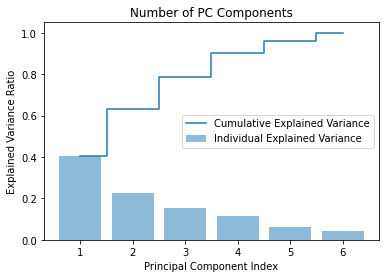

In [412]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(f"Explained variance ratio: {pca.explained_variance_}")
print(f"Total cummulative sum: {tot}")
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,7), var_exp, alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,7), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Number of PC Components')
plt.legend(loc='best')
plt.show()

### Plot explained variance ratio
- The explained variance tells you how much information (variance) can be attributed to each of the principal components. 

Text(0, 0.5, 'Cumulative Varience')

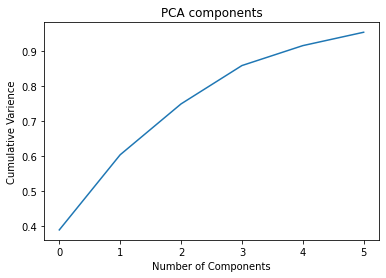

In [413]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

Plot original data without PCA
- Class 1 to 3 are not seperated clearly

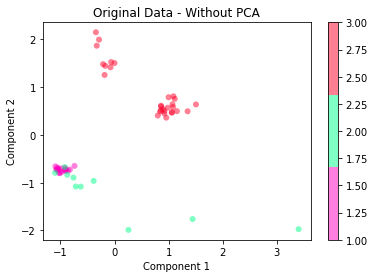

In [414]:
plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data - Without PCA')
plt.colorbar()

### Plot scatter plot for PCA
- able to see 3 cluster for class 1 to 3

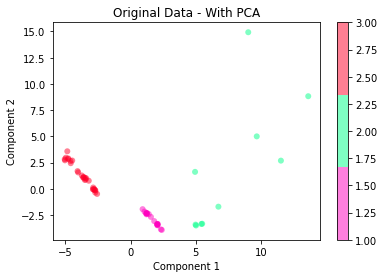

In [415]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data - With PCA')
plt.colorbar()

Counter of dataset after removal of outliers
- Healthy: 19
- Gas Injection: 24
- Waxing: 49

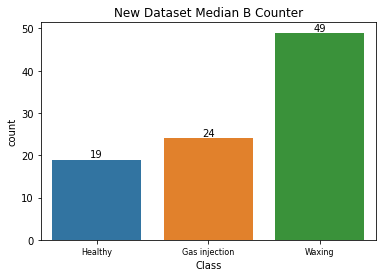

In [416]:
ax = sns.countplot(x=df_meterB['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('New Dataset Median B Counter')
plt.show()

## __9) Feature Importance - PCA__
 
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).

### All Results

In [417]:
df_pca = pd.DataFrame(abs(pca.components_), columns=col_name_meterB_no_class)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5','PC6'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R
PC1,0.05683,0.20314,0.18274,0.12474,0.11188,0.11197,0.10450,0.07771,0.10518,0.13232,0.07759,0.08561,0.18721,0.19124,0.19109,0.18989,0.17551,0.17177,0.09695,0.07008,0.18907,0.18567,0.17476,0.13230,0.02880,0.17461,0.00393,0.16327,0.16333,0.12295,0.12324,0.06943,0.06653,0.17576,0.18161,0.17287,0.17287,0.06898,0.06898,0.11182,0.11182,0.18586,0.18586,0.13979,0.13295,0.11044,0.00057,0.06964,0.09866,0.18591,0.18842
PC2,0.12383,0.08619,0.00929,0.09833,0.10150,0.10721,0.09874,0.08732,0.10170,0.12246,0.08857,0.08616,0.10780,0.09661,0.11042,0.12050,0.14068,0.14796,0.19673,0.22397,0.14028,0.13859,0.12222,0.21126,0.25336,0.14249,0.26252,0.16481,0.16522,0.18632,0.18669,0.18772,0.18712,0.14625,0.14471,0.09145,0.09145,0.19966,0.19966,0.12129,0.12129,0.11919,0.11919,0.07944,0.09446,0.11651,0.01391,0.07081,0.09816,0.10584,0.10897
PC3,0.20135,0.05990,0.01006,0.14504,0.23229,0.22890,0.24056,0.27177,0.23917,0.16529,0.12622,0.09043,0.13197,0.13792,0.08460,0.05597,0.04128,0.05098,0.18097,0.15603,0.04738,0.06659,0.13703,0.03697,0.14165,0.00265,0.15189,0.10418,0.10357,0.00185,0.00185,0.19847,0.19374,0.08899,0.09082,0.16875,0.16875,0.11232,0.11232,0.06444,0.06444,0.12153,0.12153,0.20628,0.18844,0.20373,0.03354,0.12902,0.05208,0.13832,0.12663
PC4,0.22864,0.06804,0.21171,0.25673,0.08097,0.07696,0.04907,0.08882,0.06857,0.02029,0.18657,0.34715,0.07739,0.00516,0.00203,0.02620,0.08871,0.09236,0.02950,0.06645,0.09657,0.10404,0.01574,0.00879,0.08520,0.08362,0.03937,0.01788,0.01800,0.03147,0.03162,0.07744,0.08808,0.09892,0.03574,0.00768,0.00768,0.17624,0.17624,0.28790,0.28790,0.08220,0.08220,0.01312,0.02275,0.09375,0.24164,0.34191,0.34481,0.07862,0.07523
PC5,0.12319,0.09731,0.01425,0.05441,0.24564,0.24771,0.26412,0.25239,0.25544,0.25400,0.00570,0.09848,0.00996,0.04099,0.08413,0.04140,0.16719,0.15426,0.07193,0.10566,0.00744,0.02450,0.04747,0.07543,0.02069,0.07291,0.10337,0.13619,0.13551,0.05340,0.05350,0.22834,0.22660,0.02106,0.00569,0.04093,0.04093,0.21335,0.21335,0.11926,0.11926,0.02371,0.02371,0.23922,0.27702,0.11857,0.17968,0.14007,0.05592,0.01486,0.00469
PC6,0.05208,0.00970,0.18688,0.12867,0.07193,0.07158,0.09076,0.05031,0.07730,0.18449,0.48250,0.06053,0.08173,0.11372,0.14508,0.16492,0.12149,0.12907,0.03633,0.01654,0.00117,0.01720,0.05687,0.07367,0.05864,0.04581,0.04787,0.07539,0.07517,0.04383,0.04389,0.01150,0.05669,0.00358,0.04410,0.02666,0.02666,0.12394,0.12394,0.15776,0.15776,0.06541,0.06541,0.10014,0.09640,0.30511,0.53484,0.07426,0.04433,0.08163,0.08329


### Individual PC Results
- Highest weightage to lowest according for each principal component

#### PC1 

In [418]:
df_pc1 =df_pca.iloc[[0]]
a = abs(pca.components_[0])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc1 = pd.DataFrame(values,columns=columns)
df_pc1

,Symmetry,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P4T,Transit Time P4R,Speed of Sound P4,Transit Time P4T,Gain P4T,Gain P4R,Signal Strength P4R,Crossflow,Signal Quality P4R,Signal Quality P4T,Signal Strength P2T,Turbulence P1,Turbulence P4,Gain P1T,Gain P1R,Signal Strength P2R,Signal Quality P1R,Signal Quality P1T,Transit Time P1T,Transit Time P1R,Speed of Sound P1,Turbulence P2,Swirl Angle,Signal Quality P2R,Signal Quality P2T,Flow Velocity P2,Flow Velocity P1,Gain P3T,Gain P3R,Transit Time P2T,Average Flow Velocity,Flow Velocity P3,Transit Time P3R,Signal Strength P3T,Speed of Sound P3,Flow Velocity P4,Speed of Sound P2,Signal Strength P3R,Transit Time P3T,Signal Quality P3T,Gain P2T,Gain P2R,Signal Quality P3R,Profile factor,Turbulence P3,Meter Performance,Transit Time P2R
0,0.20314,0.19124,0.19109,0.18989,0.18907,0.18842,0.18721,0.18591,0.18586,0.18586,0.18567,0.18274,0.18161,0.17576,0.17551,0.17476,0.17461,0.17287,0.17287,0.17177,0.16333,0.16327,0.13979,0.13295,0.13232,0.13230,0.12474,0.12324,0.12295,0.11197,0.11188,0.11182,0.11182,0.11044,0.10518,0.10450,0.09866,0.09695,0.08561,0.07771,0.07759,0.07008,0.06964,0.06943,0.06898,0.06898,0.06653,0.05683,0.02880,0.00393,0.00057


#### PC2

In [419]:
df_pc2 =df_pca.iloc[[1]]
a = abs(pca.components_[1])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc2 = pd.DataFrame(values,columns=columns)
df_pc2

,Meter Performance,Turbulence P3,Signal Strength P3R,Turbulence P2,Gain P2T,Gain P2R,Signal Strength P3T,Signal Quality P3T,Signal Quality P3R,Signal Quality P2R,Signal Quality P2T,Signal Quality P1R,Signal Quality P1T,Signal Strength P2R,Signal Quality P4T,Signal Quality P4R,Turbulence P4,Signal Strength P2T,Signal Strength P4T,Signal Strength P4R,Profile factor,Speed of Sound P1,Turbulence P1,Gain P3T,Gain P3R,Signal Strength P1R,Gain P4T,Gain P4R,Transit Time P2T,Signal Strength P1T,Transit Time P4R,Speed of Sound P4,Flow Velocity P2,Transit Time P4T,Average Flow Velocity,Flow Velocity P1,Flow Velocity P3,Swirl Angle,Transit Time P3R,Average Speed of Sound,Transit Time P1R,Gain P1T,Gain P1R,Speed of Sound P2,Flow Velocity P4,Symmetry,Speed of Sound P3,Transit Time P1T,Transit Time P3T,Transit Time P2R,Crossflow
0,0.26252,0.25336,0.22397,0.21126,0.19966,0.19966,0.19673,0.18772,0.18712,0.18669,0.18632,0.16522,0.16481,0.14796,0.14625,0.14471,0.14249,0.14068,0.14028,0.13859,0.12383,0.12246,0.12222,0.12129,0.12129,0.12050,0.11919,0.11919,0.11651,0.11042,0.10897,0.10780,0.10721,0.10584,0.10170,0.10150,0.09874,0.09833,0.09816,0.09661,0.09446,0.09145,0.09145,0.08857,0.08732,0.08619,0.08616,0.07944,0.07081,0.01391,0.00929


#### PC3 

In [420]:
df_pc3 =df_pca.iloc[[2]]
a = abs(pca.components_[2])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc3 = pd.DataFrame(values,columns=columns)
df_pc3

,Flow Velocity P4,Flow Velocity P3,Average Flow Velocity,Flow Velocity P1,Flow Velocity P2,Transit Time P1T,Transit Time P2T,Profile factor,Signal Quality P3T,Signal Quality P3R,Transit Time P1R,Signal Strength P3T,Gain P1T,Gain P1R,Speed of Sound P1,Signal Strength P3R,Meter Performance,Swirl Angle,Turbulence P3,Transit Time P4T,Average Speed of Sound,Turbulence P1,Speed of Sound P4,Transit Time P3T,Transit Time P4R,Speed of Sound P2,Gain P4T,Gain P4R,Gain P2T,Gain P2R,Signal Quality P1T,Signal Quality P1R,Signal Quality P4R,Speed of Sound P3,Signal Quality P4T,Signal Strength P1T,Signal Strength P4R,Gain P3T,Gain P3R,Symmetry,Signal Strength P1R,Transit Time P3R,Signal Strength P2R,Signal Strength P4T,Signal Strength P2T,Turbulence P2,Transit Time P2R,Crossflow,Turbulence P4,Signal Quality P2T,Signal Quality P2R
0,0.27177,0.24056,0.23917,0.23229,0.22890,0.20628,0.20373,0.20135,0.19847,0.19374,0.18844,0.18097,0.16875,0.16875,0.16529,0.15603,0.15189,0.14504,0.14165,0.13832,0.13792,0.13703,0.13197,0.12902,0.12663,0.12622,0.12153,0.12153,0.11232,0.11232,0.10418,0.10357,0.09082,0.09043,0.08899,0.08460,0.06659,0.06444,0.06444,0.05990,0.05597,0.05208,0.05098,0.04738,0.04128,0.03697,0.03354,0.01006,0.00265,0.00185,0.00185


#### PC4 

In [421]:
df_pc4 =df_pca.iloc[[3]]
a = abs(pca.components_[3])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc4 = pd.DataFrame(values,columns=columns)
df_pc4

,Speed of Sound P3,Transit Time P3R,Transit Time P3T,Gain P3T,Gain P3R,Swirl Angle,Transit Time P2R,Profile factor,Crossflow,Speed of Sound P2,Gain P2T,Gain P2R,Signal Strength P4R,Signal Quality P4T,Signal Strength P4T,Transit Time P2T,Signal Strength P2R,Flow Velocity P4,Signal Strength P2T,Signal Quality P3R,Turbulence P3,Turbulence P4,Gain P4T,Gain P4R,Flow Velocity P1,Transit Time P4T,Signal Quality P3T,Speed of Sound P4,Flow Velocity P2,Transit Time P4R,Average Flow Velocity,Symmetry,Signal Strength P3R,Flow Velocity P3,Meter Performance,Signal Quality P4R,Signal Quality P2R,Signal Quality P2T,Signal Strength P3T,Signal Strength P1R,Transit Time P1R,Speed of Sound P1,Signal Quality P1R,Signal Quality P1T,Turbulence P1,Transit Time P1T,Turbulence P2,Gain P1T,Gain P1R,Average Speed of Sound,Signal Strength P1T
0,0.34715,0.34481,0.34191,0.28790,0.28790,0.25673,0.24164,0.22864,0.21171,0.18657,0.17624,0.17624,0.10404,0.09892,0.09657,0.09375,0.09236,0.08882,0.08871,0.08808,0.08520,0.08362,0.08220,0.08220,0.08097,0.07862,0.07744,0.07739,0.07696,0.07523,0.06857,0.06804,0.06645,0.04907,0.03937,0.03574,0.03162,0.03147,0.02950,0.02620,0.02275,0.02029,0.01800,0.01788,0.01574,0.01312,0.00879,0.00768,0.00768,0.00516,0.00203


#### PC5

In [422]:
df_pc5 =df_pca.iloc[[4]]
a = abs(pca.components_[4])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc5 = pd.DataFrame(values,columns=columns)
df_pc5

,Transit Time P1R,Flow Velocity P3,Average Flow Velocity,Speed of Sound P1,Flow Velocity P4,Flow Velocity P2,Flow Velocity P1,Transit Time P1T,Signal Quality P3T,Signal Quality P3R,Gain P2T,Gain P2R,Transit Time P2R,Signal Strength P2T,Signal Strength P2R,Transit Time P3T,Signal Quality P1T,Signal Quality P1R,Profile factor,Gain P3T,Gain P3R,Transit Time P2T,Signal Strength P3R,Meter Performance,Speed of Sound P3,Symmetry,Signal Strength P1T,Turbulence P2,Turbulence P4,Signal Strength P3T,Transit Time P3R,Swirl Angle,Signal Quality P2R,Signal Quality P2T,Turbulence P1,Signal Strength P1R,Average Speed of Sound,Gain P1T,Gain P1R,Signal Strength P4R,Gain P4T,Gain P4R,Signal Quality P4T,Turbulence P3,Transit Time P4T,Crossflow,Speed of Sound P4,Signal Strength P4T,Speed of Sound P2,Signal Quality P4R,Transit Time P4R
0,0.27702,0.26412,0.25544,0.25400,0.25239,0.24771,0.24564,0.23922,0.22834,0.22660,0.21335,0.21335,0.17968,0.16719,0.15426,0.14007,0.13619,0.13551,0.12319,0.11926,0.11926,0.11857,0.10566,0.10337,0.09848,0.09731,0.08413,0.07543,0.07291,0.07193,0.05592,0.05441,0.05350,0.05340,0.04747,0.04140,0.04099,0.04093,0.04093,0.02450,0.02371,0.02371,0.02106,0.02069,0.01486,0.01425,0.00996,0.00744,0.00570,0.00569,0.00469


#### PC6

In [423]:
df_pc6 =df_pca.iloc[[5]]
a = abs(pca.components_[5])
b = zip(col_name_meterB_no_class,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc6 = pd.DataFrame(values,columns=columns)
df_pc6

,Transit Time P2R,Speed of Sound P2,Transit Time P2T,Crossflow,Speed of Sound P1,Signal Strength P1R,Gain P3T,Gain P3R,Signal Strength P1T,Signal Strength P2R,Swirl Angle,Gain P2T,Gain P2R,Signal Strength P2T,Average Speed of Sound,Transit Time P1T,Transit Time P1R,Flow Velocity P3,Transit Time P4R,Speed of Sound P4,Transit Time P4T,Average Flow Velocity,Signal Quality P1T,Signal Quality P1R,Transit Time P3T,Turbulence P2,Flow Velocity P1,Flow Velocity P2,Gain P4T,Gain P4R,Speed of Sound P3,Turbulence P3,Turbulence P1,Signal Quality P3R,Profile factor,Flow Velocity P4,Meter Performance,Turbulence P4,Transit Time P3R,Signal Quality P4R,Signal Quality P2R,Signal Quality P2T,Signal Strength P3T,Gain P1T,Gain P1R,Signal Strength P4R,Signal Strength P3R,Signal Quality P3T,Symmetry,Signal Quality P4T,Signal Strength P4T
0,0.53484,0.48250,0.30511,0.18688,0.18449,0.16492,0.15776,0.15776,0.14508,0.12907,0.12867,0.12394,0.12394,0.12149,0.11372,0.10014,0.09640,0.09076,0.08329,0.08173,0.08163,0.07730,0.07539,0.07517,0.07426,0.07367,0.07193,0.07158,0.06541,0.06541,0.06053,0.05864,0.05687,0.05669,0.05208,0.05031,0.04787,0.04581,0.04433,0.04410,0.04389,0.04383,0.03633,0.02666,0.02666,0.01720,0.01654,0.01150,0.00970,0.00358,0.00117


### Biplots
- display bilpot to verify with individual pc results
- may be hard to visualize since it is plot in 2 dimension

#### PC1 and PC2

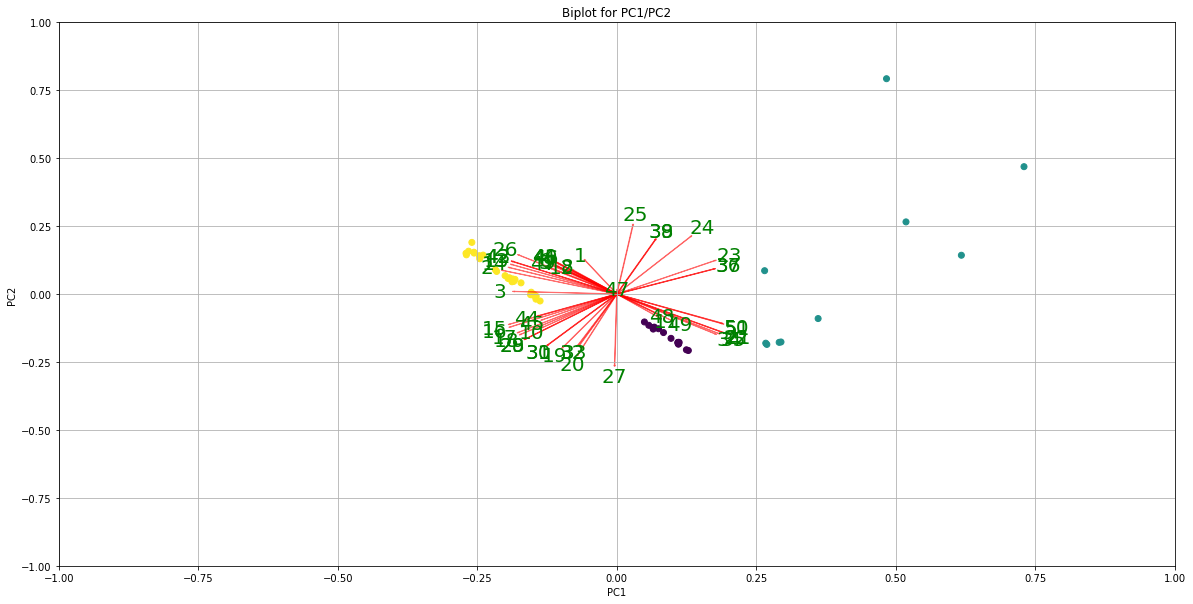

In [424]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y= dataset['Class']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1),fontsize=20, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC1/PC2')
plt.xlabel("PC1".format(1))
plt.ylabel("PC2".format(2))
plt.show()

PC3 and PC4

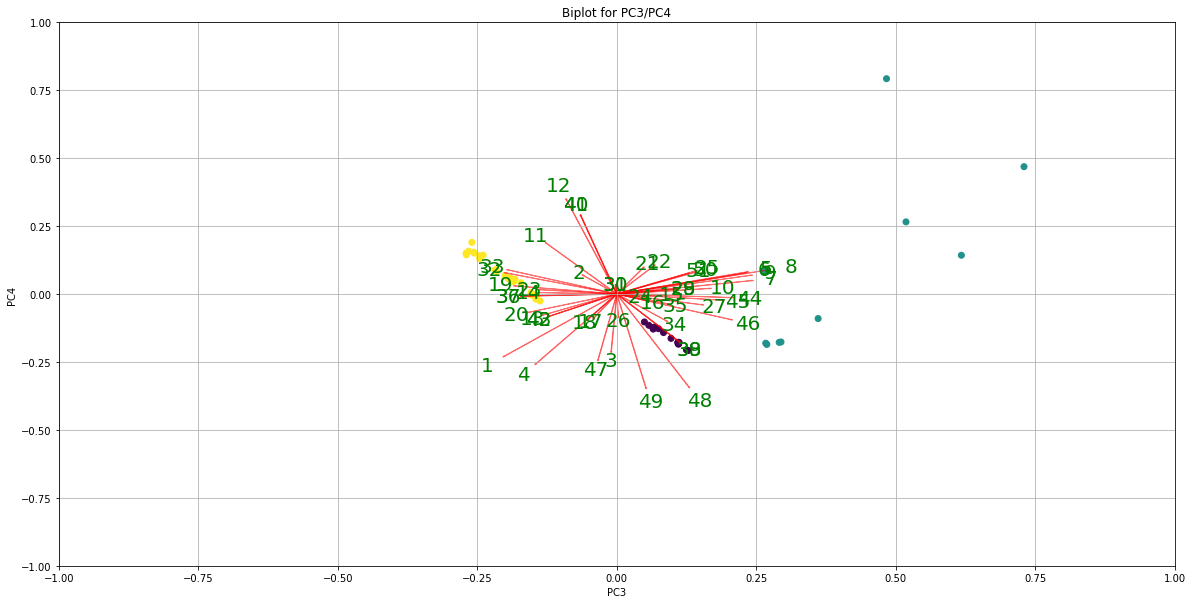

In [425]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[2:4, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC3/PC4')
plt.xlabel("PC3".format(1))
plt.ylabel("PC4".format(2))
plt.show()

PC5 and PC6

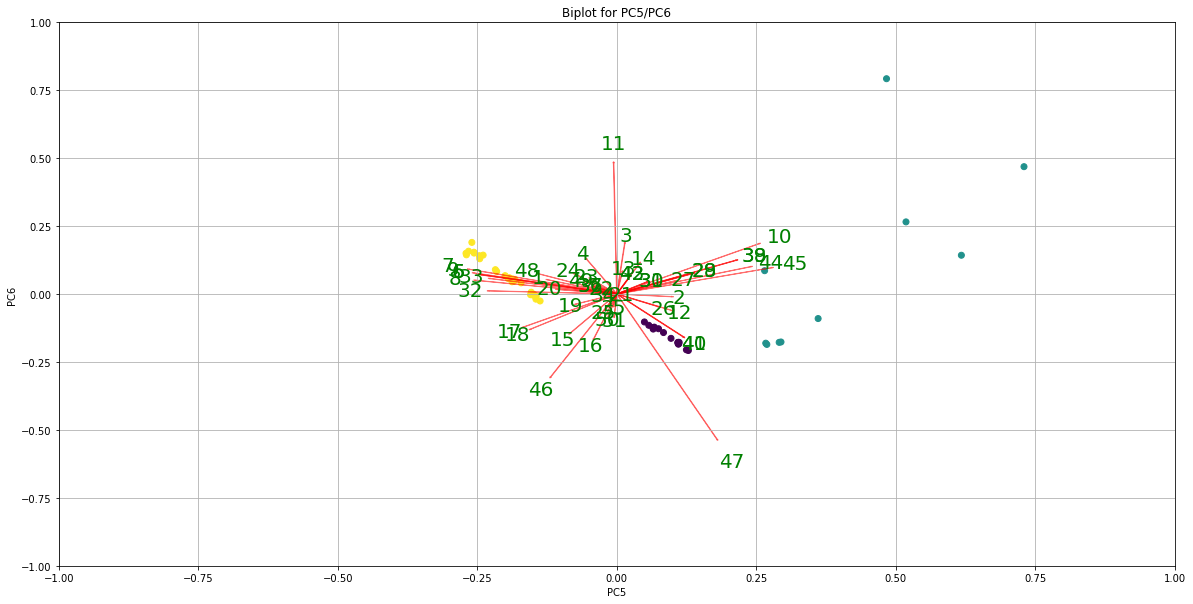

In [426]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[4:6, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC5/PC6')
plt.xlabel("PC5".format(1))
plt.ylabel("PC6".format(2))
plt.show()

# __Data Mining__

## __1) Split Dataset 70/30__

In [427]:
from sklearn.model_selection import train_test_split
# use this as main model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# perform pca on dataset 
pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## __2) Supervised Learning__
Supervised learning is a machine learning approach that is defined by the use of labelled datasets. As a result, by using labelled inputs, the model can measure its own accuracy and predict outcome accuracy through learning new data over time.

Includes:
- Logistic Regression
- Linear Support Vector Machine
- Non-Linear Support Vector Machine
- Decision Tree
- Neural Network
- Naives Bayes
- Linear Discriminant 


### Linear Prediction using Logistics Regression 
Logistic regression estimates the probability of an event occurring based on a given dataset of independent variables. Since outcome is a probability, the dependent variable is bounded between 0 to 1 value.

Model score: 0.94
Highest training accuracy: 0.94
Highest testing accuracy: 0.94
Lowest testing accuracy: 0.61


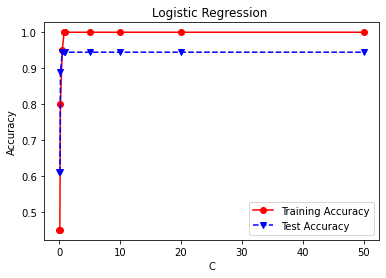

In [428]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtrainAcc = []
LRtestAcc = []

for param in C:
    clf3 = linear_model.LogisticRegression(C=param)
    clf3.fit(X_train, y_train)
    Y_predTrain = clf3.predict(X_train)
    Y_predTest = clf3.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    LRtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression ')

print (f"Model score: {round(clf3.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(LRtestAcc),2))
print("Highest testing accuracy:", round(max(LRtestAcc),2))
print("Lowest testing accuracy:", round(min(LRtestAcc),2))




### Linear Support Vector Machine
The objective of the support vector machine is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The number of hyperplanes will be based on the number of input features.


Model score: 0.94
Highest training accuracy: 0.94
Highest testing accuracy: 0.94
Lowest testing accuracy: 0.61


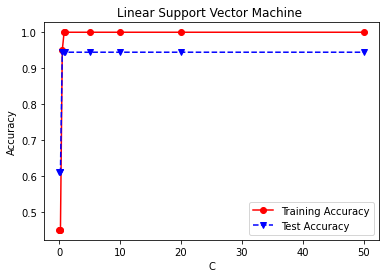

In [429]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Linear Support Vector Machine ')
print (f"Model score: {round(clf4.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(SVMtestAcc),2))
print("Highest testing accuracy:", round(max(SVMtestAcc),2))
print("Lowest testing accuracy:", round(min(SVMtestAcc),2))



### Non Linear Support Vector Machine(SVM)
Where there are more than three classes, when they are not linearly separable. Non linear support vector machines will be required to classify these data points. 

Model score: 0.94
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.61


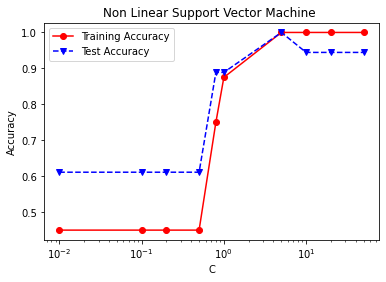

In [430]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(X_train, y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.title('Non Linear Support Vector Machine ')

print (f"Model score: {round(clf5.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(SVMtestAcc),2))
print("Highest testing accuracy:", round(max(SVMtestAcc),2))
print("Lowest testing accuracy:", round(min(SVMtestAcc),2))

### Decision Tree
A decision tree is similar to a flowchart where each internal nodes denotes a test on an attribute where each branch represents an outcome of the test and each leaf nodes contains a class label.


Model score: 1.0
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.61


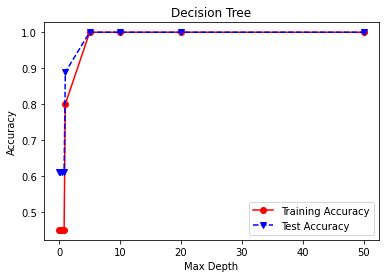

In [431]:
from sklearn.tree import DecisionTreeClassifier

clf7 = DecisionTreeClassifier(max_depth=10)
maxdepth = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in C:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(X_train, y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, dt_trainAcc, 'ro-', C, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

plt.title('Decision Tree')
print (f"Model score: {round(clf7.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(dt_trainAcc),2))
print("Highest testing accuracy:", round(max(dt_testAcc),2))
print("Lowest testing accuracy:", round(min(dt_testAcc),2))

In [432]:
Y = df_remove_meterB['Class']
X = df_remove_meterB.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=59)
clf = clf.fit(X, Y)

[Text(0.6, 0.8333333333333334, 'Gain P3T <= 51.4\nentropy = 1.445\nsamples = 57\nvalue = [19, 9, 29]\nclass = 3'),
 Text(0.4, 0.5, 'Signal Strength P1T <= 4410.6\nentropy = 0.906\nsamples = 28\nvalue = [19, 9, 0]\nclass = 1'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]\nclass = 2'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0]\nclass = 1'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = 3')]

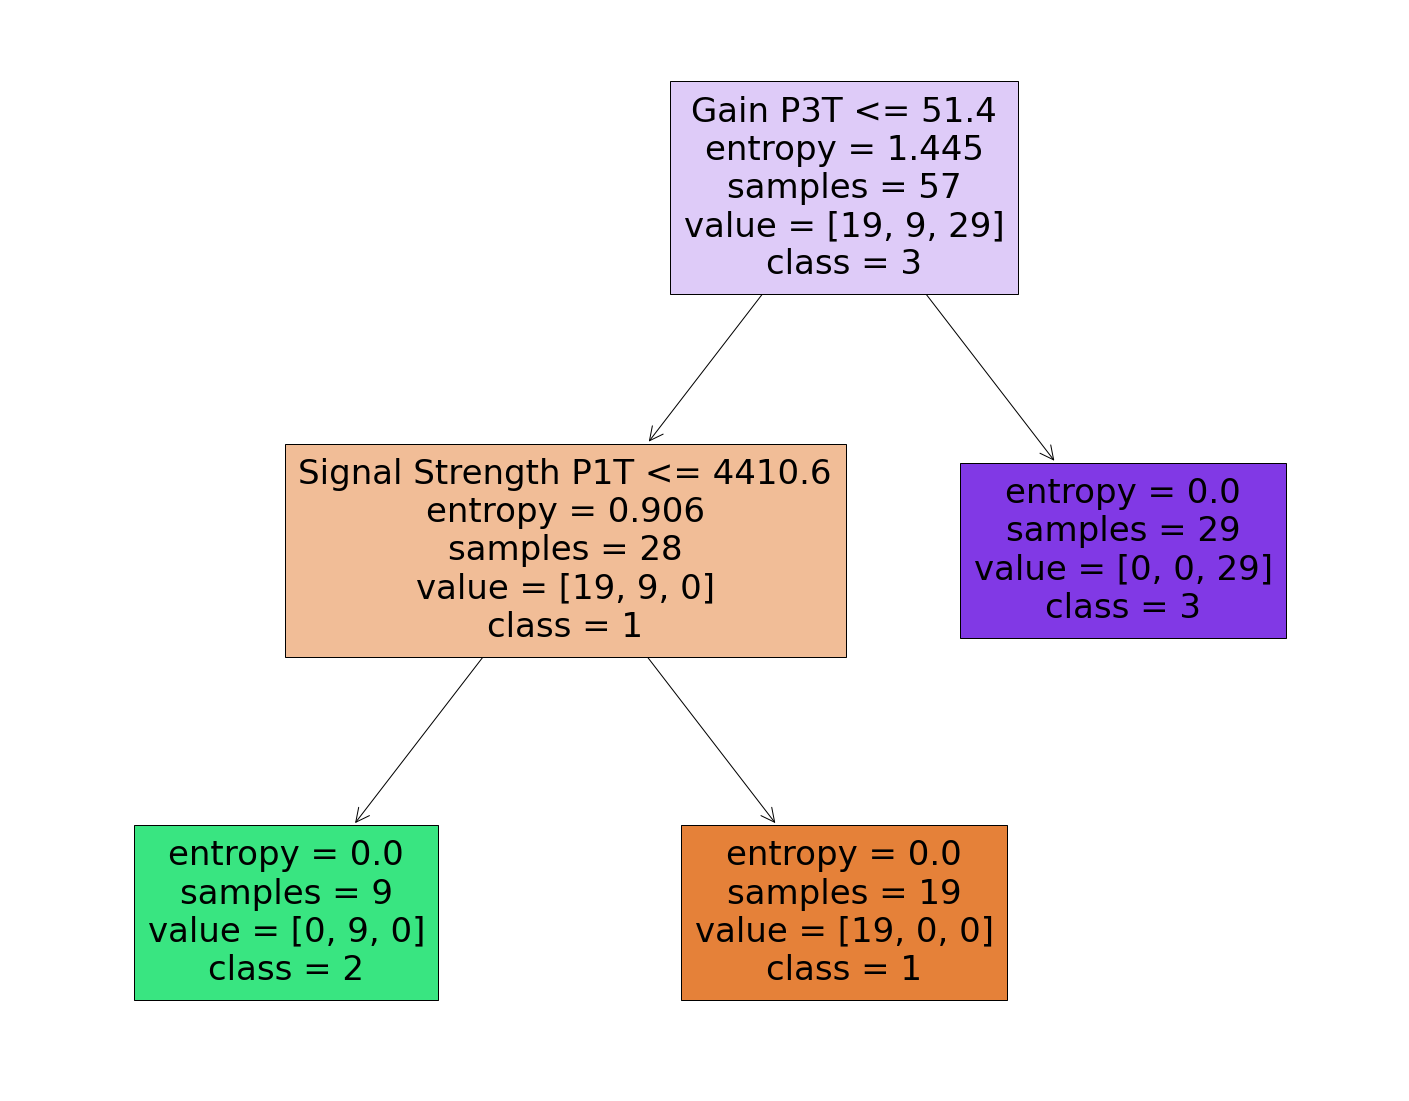

In [433]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=['1','2','3','4'],filled=True, impurity=True)

### Neural Network
Artificial neural networks (ANN) are composed of a node layer, containing an input layer, one or more hidden layers and an output layer.


Model score: 1.0
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.94


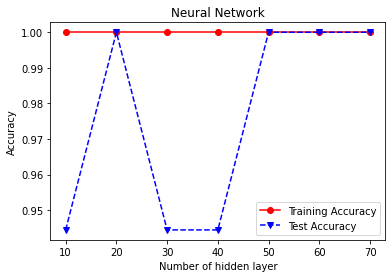

In [434]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

plt.title('Neural Network')
print (f"Model score: {round(clf6.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(trainAcc),2))
print("Highest testing accuracy:", round(max(testAcc),2))
print("Lowest testing accuracy:", round(min(testAcc),2))

### Naive Bayes
Naive Bayes is a classification based that assumes the presence of a feature in class is not related to any feature. Hence, it is used in binary classification problems.


In [435]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(y_train, Y_predTrain)
testAcc=accuracy_score(y_test, Y_predTest)


print (f"Model score: {round(clf2.score(X_test, y_test),2)}")
print("Training Accuracy:",round(trainAcc,2))
print("Testing Accuracy:",round(testAcc,2))

Model score: 1.0
Training Accuracy: 1.0
Testing Accuracy: 1.0


### Linear Discriminant
Linear Discriminants is a statistical method of dimensionality reduction that provides the highest possible discrimination among various classes.


In [436]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print (f"Model score: {round(lda.score(X_test, y_test),2)}")
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Model score: 0.94
Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 0.94


## __3) Unsupervised Learning__
Unsupervised learning uses machine learning algorithms to analyse and cluster unlabeled dataset. By doing so, it will be able to discover hidden patterns in the data without the need of human intervention.

Includes:
- K Nearest Neighbor (KNN)
- K Means Clustering


### K Nearest Neighbour (KNN)
KNN algorithm assumes that similar data points exist in a close proximity. Hence, working off the assumption that similar points can be found near each other. A class label will be assigned based on majority voting.



Model score: 0.89
Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.78


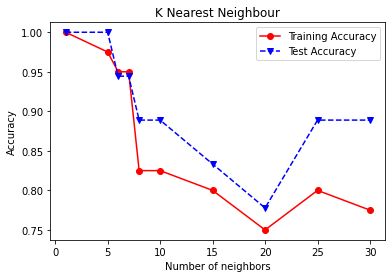

In [437]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

numNeighbors = [1, 5, 6,7,8, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(X_train, y_train)
    Y_predTrain = clf1.predict(X_train)
    Y_predTest = clf1.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

plt.title('K Nearest Neighbour')

print (f"Model score: {round(clf1.score(X_test, y_test),2)}")
print("Highest training accuracy:", round(max(trainAcc),2))
print("Highest testing accuracy:", round(max(testAcc),2))
print("Lowest testing accuracy:", round(min(testAcc),2))

### K-Means Clustering
K-Means algorithms in data mining starts with randomly selecting the centroid for the first group, which will be used as the beginning points for every cluster. Depending on the number of data points, the new centroid optimised position will be determined through iterative calculation. 

Decide how many clustering solutions to test.

In [438]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters =i,init='k-means++',random_state=0)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)

Determine the number of clusters we’d like to keep. Use the Elbow-method where cluster = 3 

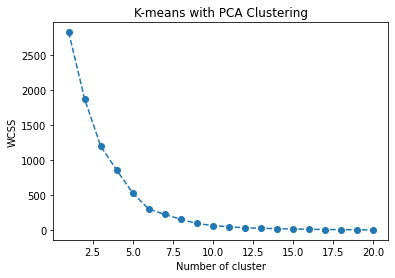

In [439]:
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

Initialise and fit data

In [440]:
kmeans_pca = KMeans(n_clusters=3,init='k-means++',random_state=0)
# fit data into kmeans model
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

Create new dataframe and display new PC results with new K means label

In [441]:
df_segm_pca_kmeans = pd.concat([dataset.reset_index(drop=True),pd.DataFrame(X_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-6:] =['PC1','PC2','PC3','PC4','PC5','PC6']
df_segm_pca_kmeans['K-means']= kmeans_pca.labels_
df_segm_pca_kmeans.head()

,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class,PC1,PC2,PC3,PC4,PC5,PC6,K-means
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,1486.38217,1485.37206,1484.98900,1485.15322,5260.65556,5067.58889,4977.82222,4984.07778,5170.31111,5200.20556,4111.52778,4291.85000,9.03894,4.42683,4.50456,9.24122,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1,2.39343,-3.91634,0.26906,-0.27356,1.42223,-1.65552,0
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,1486.25922,1485.25033,1484.86706,1485.03072,5256.22778,5065.40000,4978.02222,4981.43333,5172.34444,5200.81667,4107.14444,4286.32778,9.03017,4.28400,4.59750,9.16644,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1,2.32804,-3.86697,0.26836,-0.38445,1.42419,-1.74416,0
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,1486.28822,1485.28100,1484.89889,1485.06111,5278.55000,5002.90000,4971.04444,4958.05556,5146.37778,5179.37222,4039.27222,4302.88333,9.78072,4.61200,4.54478,10.23117,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1,2.05864,-3.47697,1.14106,-0.03141,0.58310,-1.36027,0
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,1486.35717,1485.35044,1484.97017,1485.13128,5276.14444,4994.79444,4973.30556,4956.30556,5149.92222,5175.68889,4036.35556,4297.37778,9.74939,4.83533,4.74928,10.94506,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1,2.05645,-3.34874,1.15899,0.00232,0.56991,-1.30275,0
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,1486.32844,1485.32050,1484.94433,1485.10328,5272.71667,4993.56111,4969.87778,4952.24444,5147.42222,5174.01111,4035.33889,4297.57222,9.60233,4.47989,4.71683,9.98406,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1,2.07041,-3.45097,1.17343,0.03617,0.58930,-1.34888,0


In [442]:
df_segm_pca_kmeans['k_means_class']=df_segm_pca_kmeans['K-means'].map({0:1,1:3,2:2})

K means reclassify the label with reclass 6 values from class 2 into 1.

/Users/kenjileong/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


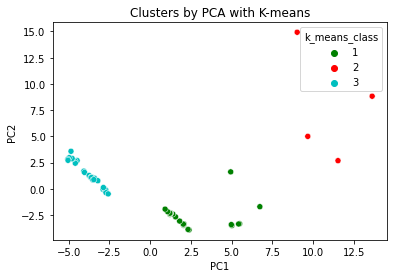

In [443]:
import seaborn as sns
x_axis= df_segm_pca_kmeans['PC1']
y_axis= df_segm_pca_kmeans['PC2']
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['k_means_class'],palette=['g','r','c'])
plt.title('Clusters by PCA with K-means')
plt.show()

In [444]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

Display centroid

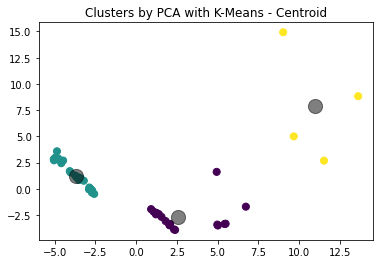

In [445]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters by PCA with K-Means - Centroid')
plt.show()

Percentage change between PCA and PCA with K-means__
- 10% changes of data. However, Kmeans cannot be used because, it reclassify the labels while initial labels has already been provided.
- Purpose is to display unsupervised results from K means

In [446]:
# drop pca columns
df_segm_pca_kmeans = df_segm_pca_kmeans.drop(['Class','PC1','PC2','PC3','PC4','PC5','PC6','K-means'],axis=1)
print(df_segm_pca_kmeans.shape)
df_segm_pca_kmeans.head()

(58, 52)


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,k_means_class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,1486.38217,1485.37206,1484.98900,1485.15322,5260.65556,5067.58889,4977.82222,4984.07778,5170.31111,5200.20556,4111.52778,4291.85000,9.03894,4.42683,4.50456,9.24122,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,1486.25922,1485.25033,1484.86706,1485.03072,5256.22778,5065.40000,4978.02222,4981.43333,5172.34444,5200.81667,4107.14444,4286.32778,9.03017,4.28400,4.59750,9.16644,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,1486.28822,1485.28100,1484.89889,1485.06111,5278.55000,5002.90000,4971.04444,4958.05556,5146.37778,5179.37222,4039.27222,4302.88333,9.78072,4.61200,4.54478,10.23117,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,1486.35717,1485.35044,1484.97017,1485.13128,5276.14444,4994.79444,4973.30556,4956.30556,5149.92222,5175.68889,4036.35556,4297.37778,9.74939,4.83533,4.74928,10.94506,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,1486.32844,1485.32050,1484.94433,1485.10328,5272.71667,4993.56111,4969.87778,4952.24444,5147.42222,5174.01111,4035.33889,4297.57222,9.60233,4.47989,4.71683,9.98406,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


In [447]:
print(df_median_meterB.shape)
df_median_meterB.head()

(58, 52)


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,1486.38217,1485.37206,1484.98900,1485.15322,5260.65556,5067.58889,4977.82222,4984.07778,5170.31111,5200.20556,4111.52778,4291.85000,9.03894,4.42683,4.50456,9.24122,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,1486.25922,1485.25033,1484.86706,1485.03072,5256.22778,5065.40000,4978.02222,4981.43333,5172.34444,5200.81667,4107.14444,4286.32778,9.03017,4.28400,4.59750,9.16644,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,1486.28822,1485.28100,1484.89889,1485.06111,5278.55000,5002.90000,4971.04444,4958.05556,5146.37778,5179.37222,4039.27222,4302.88333,9.78072,4.61200,4.54478,10.23117,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,1486.35717,1485.35044,1484.97017,1485.13128,5276.14444,4994.79444,4973.30556,4956.30556,5149.92222,5175.68889,4036.35556,4297.37778,9.74939,4.83533,4.74928,10.94506,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,1486.32844,1485.32050,1484.94433,1485.10328,5272.71667,4993.56111,4969.87778,4952.24444,5147.42222,5174.01111,4035.33889,4297.57222,9.60233,4.47989,4.71683,9.98406,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


In [448]:
# reset index
df_median_meterB = df_median_meterB.reset_index(drop=True)
df_segm_pca_kmeans = df_segm_pca_kmeans.reset_index(drop=True)

df = pd.concat(
    [df_median_meterB[['Class']], df_segm_pca_kmeans[['k_means_class']]],
    axis=1)

print(df['Class'].value_counts())
print(df['k_means_class'].value_counts())

df['compare'] = np.where(df['Class'] == df['k_means_class'], 'True', 'False')
changes = (df['compare'].values == 'False').sum()
percentage_change = (changes / df.shape[0]) * 100
print('Percentage change: ' + str(round(percentage_change, 2)))

3    29
1    19
2    10
Name: Class, dtype: int64
3    29
1    25
2     4
Name: k_means_class, dtype: int64
Percentage change: 10.34


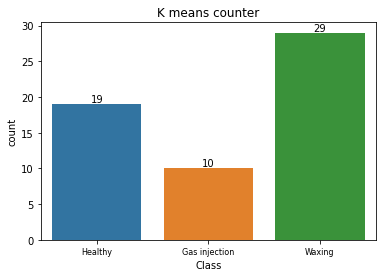

In [449]:
ax = sns.countplot(x=dataset['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection',  'Waxing'], fontsize=8) 
plt.title('K means counter')
plt.show()

## __4) Anomaly Detection using Random Forest__
Random forest consists of generating multiple random decision trees and the results are concluded through majority voting. Hence, it is less sensitive to changes in the training data.

Confusion matrix is used to measure performance of any machine learning classification problem where depending on the number of classes, it will affect the dimension size of the matrix containing a combination of predicted and actual values.


Results: confusion matrix has a high accuracy of 0.94, which is good for data prediction due to removal of outliers.

In [450]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [451]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


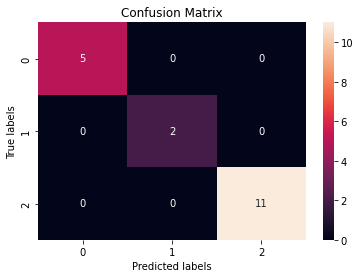

Accuracy : 1.0


In [452]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

print('Accuracy : ' + str(round(accuracy_score(y_test, y_pred),2)))

## __5) Anomaly Detection using Linear Regression(MSE, MAE, RMSE)__
Linear regression fits a straight line across two variables and is used to predict the value of a variable based on the value of another variable. The predicted variable is called the dependent variable while the variable used to predict another variable is called the independent variable. 

Display linear regression between PC1 and PC2

Results: 
- Mean Absolute Error: 2.07
- Mean Squared Error: 16.37
- Root Mean Squared Error: 4.05

In [453]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(X_pca)
df.head()

,0,1,2,3,4,5
0,2.39343,-3.91634,0.26906,-0.27356,1.42223,-1.65552
1,2.32804,-3.86697,0.26836,-0.38445,1.42419,-1.74416
2,2.05864,-3.47697,1.14106,-0.03141,0.58310,-1.36027
3,2.05645,-3.34874,1.15899,0.00232,0.56991,-1.30275
4,2.07041,-3.45097,1.17343,0.03617,0.58930,-1.34888


In [454]:
XTemp = df[0].values.reshape(-1, 1)
yTemp = df[1].values.reshape(-1, 1)

In [455]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(
        XTemp, yTemp, test_size=0.3, random_state=0)

In [456]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
y_predTemp = regressorTemp.predict(X_testTemp)

In [457]:
print('Mean Absolute Error:',
          round(metrics.mean_absolute_error(y_testTemp, y_predTemp),2))
print('Mean Squared Error:',
        round(metrics.mean_squared_error(y_testTemp, y_predTemp),2))
print('Root Mean Squared Error:',
        round(np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)),2))
        
# get intercept:
print("y intercept: " + str(regressorTemp.intercept_))
# get slope:
print("slope: " + str(regressorTemp.coef_))

Mean Absolute Error: 2.07
Mean Squared Error: 16.37
Root Mean Squared Error: 4.05
y intercept: [-0.09639048]
slope: [[-0.07912449]]


Text(0, 0.5, 'PC2')

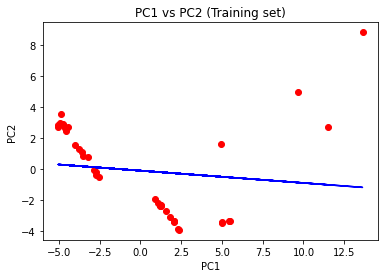

In [458]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

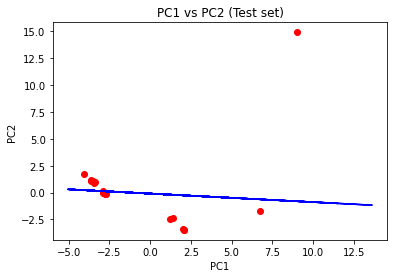

In [459]:
  # show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')